In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

#note that x y values must be in 'meters'

def quadraticII(x, y, a, b, c, d, e, f, g, h, i, j):
     
    if (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j) < 0.0:
        delta = 0
        print("delta < 0!")
        z1 =  (-(e*x + f*y + i)) / (2*c)
        z2 =  (-(e*x + f*y + i)) / (2*c)
                    
    else:
        delta = (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j)
    
        z1 =  (-(e*x + f*y + i) + np.sqrt(delta)) / (2*c)
        z2 =  (-(e*x + f*y + i) - np.sqrt(delta)) / (2*c)
    return z1, z2

def quadraticIII(x, y, a, b, c, d, e, f, g, h, i, j):
    x = x.all()
    y = y.all()
    
    if (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j) < 0.0:
        delta = 0
        print("delta < 0!")
        z1 =  (-(e*x + f*y + i)) / (2*c)
        z2 =  (-(e*x + f*y + i)) / (2*c)
                    
    else:
        delta = (e*x + f*y + i)**2 - 4*c*(a*(x)**2 + b*(y)**2 + d*x*y + g*x + h*y + j)
    
        z1 =  (-(e*x + f*y + i) + np.sqrt(delta)) / (2*c)
        z2 =  (-(e*x + f*y + i) - np.sqrt(delta)) / (2*c)
    return z2

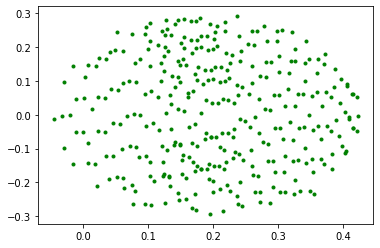

In [2]:
#plot 3d points from rim surface which is in m1rf
m1pts = np.loadtxt('temp.sfc', skiprows=2)
#now test z return function with real x y values from the measured data
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre = xre[1::10]
yre = yre[1::10]
#take only every 10th value from real rim points in xy

# X, Y = np.meshgrid(xre, yre)
# print(X.shape)

fig = plt.figure(2)
plt.plot(xre,yre,'g.')
plt.show()



In [3]:
print(len(xre))

342


In [4]:
#Use ideal mirror parameters as initial guess for quadratic
#returns z points for given xy points
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J
zre1 = np.array([])
zre2 = np.array([])

for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)

Text(0.5, 0, 'z')

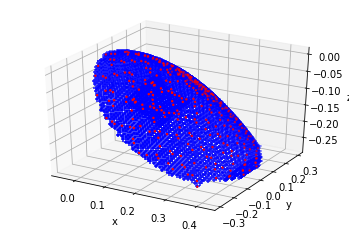

In [5]:
#plot returned z values on measured zxy points
%matplotlib inline
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='+')
ax.scatter(xre, yre, zre2, c='r', linewidth=None, s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [6]:
#test pars from other program
opars = [-2.12946985e+03, -2.14752915e+03, -2.69507279e+01,  1.51878244e+00,4.79717339e+01, -2.30043513e+00, -1.12499455e+00, -5.86749641e-01, -1.43627457e+03,  1.00000000e-06]
#initial pars vars = A      B           C       D        E         F      G        H        I            J
zre1 = np.array([])
zre2 = np.array([])

for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *opars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)

Text(0.5, 0, 'z')

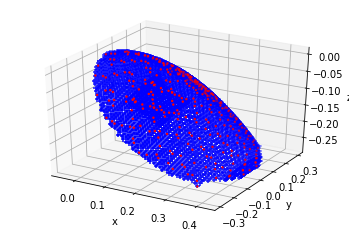

In [7]:
#plot returned z values on measured zxy points
%matplotlib inline
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='+')
ax.scatter(xre, yre, zre2, c='r', linewidth=None, s=2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [9]:
#compare z vals based on different parameters
zre1 = np.array([])
zre2 = np.array([])
zre1t = np.array([])
zre2t = np.array([])
for i in range(len(xre)):
    #print(xre[i], yre[i])    
    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)
    z1, z2 = quadraticII(xre[i], yre[i], *opars)
    zre1t = np.append(zre1t, z1)
    zre2t = np.append(zre2t, z2)

In [18]:
#print(zre2t-zre2)
print(zre2t,zre2)

[-0.27393387 -0.2717702  -0.2741657  -0.27369237 -0.26457867 -0.26646288
 -0.26665149 -0.26448364 -0.26616477 -0.25496646 -0.26130986 -0.26218124
 -0.25485113 -0.26506646 -0.25411154 -0.24648273 -0.25642893 -0.25432982
 -0.23932382 -0.24182614 -0.26168365 -0.24205105 -0.23021662 -0.23620208
 -0.25926891 -0.24222393 -0.22432228 -0.22396658 -0.24133714 -0.26060955
 -0.22955677 -0.21480386 -0.21801863 -0.23877745 -0.25058939 -0.22031902
 -0.20659523 -0.21089938 -0.23284665 -0.24561349 -0.21412204 -0.1991012
 -0.20227991 -0.22326393 -0.24721052 -0.2122957  -0.19324159 -0.19223077
 -0.20946172 -0.24291639 -0.21879764 -0.19205203 -0.18277831 -0.1919984
 -0.2186982  -0.23590926 -0.19957366 -0.17893201 -0.17653091 -0.1926655
 -0.22543078 -0.21910509 -0.18584347 -0.16925168 -0.17131356 -0.19176421
 -0.22804683 -0.20672338 -0.17541317 -0.16114708 -0.16569952 -0.18862242
 -0.22717866 -0.19856004 -0.16748678 -0.1537587  -0.15904966 -0.18270902
 -0.22186033 -0.1935811  -0.16159544 -0.14691495 -0.15

(342,) (342,)


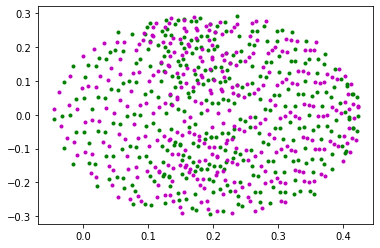

In [10]:
#test pars from other program
opars = [-2.12946985e+03, -2.14752915e+03, -2.69507279e+01,  1.51878244e+00,4.79717339e+01, -2.30043513e+00, -1.12499455e+00, -5.86749641e-01, -1.43627457e+03,  1.00000000e-06]
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J

#create another circle of points
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre1 = xre[1::10]
yre1 = yre[1::10]
xret = xre[4::10]
yret = yre[4::10]
print(xre1.shape,xret.shape)

fig = plt.figure(2)
plt.plot(xre1,yre1,'g.')
plt.plot(xret,yret,'m.')
plt.show()

zre1t = np.array([])
zre2t = np.array([])
for i in range(len(xret)):

    z1, z2 = quadraticII(xret[i], yret[i], *opars)
    zre1t = np.append(zre1t, z1)
    zre2t = np.append(zre2t, z2)

Text(0.5, 0, 'z')

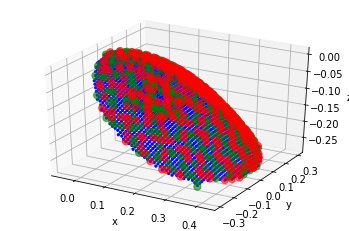

In [12]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m1pts[:,0]/1000, m1pts[:,1]/1000, m1pts[:,2]/1000, c='b', marker='.')
ax.scatter(xre1, yre1, zre2, c='g', marker='.', linewidth=None, s=200, alpha=0.6)
ax.scatter(xret, yret, zre2t, c='r', marker='.', linewidth=None, s=200, alpha=0.6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [47]:
print(xret.shape, yret.shape, zre2t.shape)

(342,) (342,) (342,)


In [13]:
#analyse two parameter sets on same set of x y points
modpars = [-2.12946985e+03, -2.14752915e+03, -2.69507279e+01,  1.51878244e+00,4.79717339e+01, -2.30043513e+00, -1.12499455e+00, -5.86749641e-01, -1.43627457e+03,  1.00000000e-06]
initialpars = (-0.00274866, -0.00274866, -7e-5, 1.4e-23, 4.8e-22, 1e-22, 5.6e-19, 1.8e-20, -0.00183404, -1e-6)
#initial pars vars = A      B           C       D        E         F      G        H        I            J

#create another circle of points
xre = m1pts[:,0]/1000
yre = m1pts[:,1]/1000
xre = xre[1::10]
yre = yre[1::10]

zre1 = np.array([])
zre2 = np.array([])
zre1mod = np.array([])
zre2mod = np.array([])
for i in range(len(xre)):

    z1, z2 = quadraticII(xre[i], yre[i], *initialpars)
    zre1 = np.append(zre1, z1)
    zre2 = np.append(zre2, z2)
    
    z1, z2 = quadraticII(xre[i], yre[i], *modpars)
    zre1mod = np.append(zre1mod, z1)
    zre2mod = np.append(zre2mod, z2)

Text(0.5, 0, 'z difference')

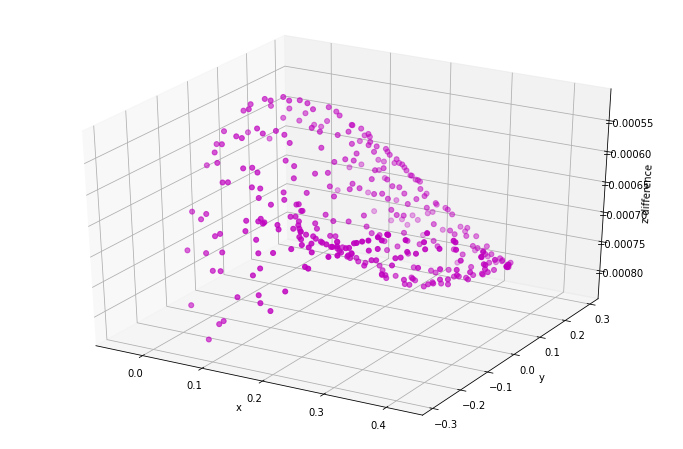

In [29]:
%matplotlib qt
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xre1, yre1, zre2-zre2mod, c='m', marker='.', linewidth=None, s=100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z difference")

(342,) (342,)
(342,)
max % difference between models 47.10108326490876


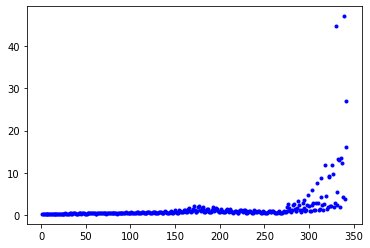

In [15]:
#simple % diff analysis
%matplotlib inline
pdiff = zre2-zre2mod
print(pdiff.shape, zre2.shape)
pdiff = ((pdiff) / zre2 ) * 100
print(pdiff.shape)
print("max % difference between models", max(pdiff))
plt.plot(np.linspace(1,len(pdiff), len(pdiff)), pdiff, 'b.', linewidth=None)

(342,) (342,)
(342,)
max % difference between models 47.10108326490876


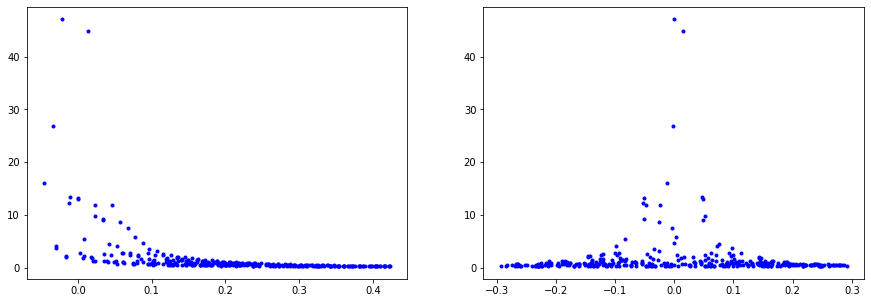

In [25]:
#simple % diff analysis
%matplotlib inline
pdiff = zre2-zre2mod
print(pdiff.shape, zre2.shape)
pdiff = ((pdiff) / zre2 ) * 100
print(pdiff.shape)
print("max % difference between models", max(pdiff))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(xre, pdiff, 'b.', linewidth=None)
plt.subplot(1,2,2)
plt.plot(yre, pdiff, 'b.', linewidth=None)